# lloq-multipanel-figure
2.8.23

Can I use matplotlib's subplotting function to make a multipanel figure for the LLOQ experiment? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Get LLOQs from the orig and imputed matrices

In [2]:
fom_orig = pd.read_csv("path/to/the/data")
orig_loq = fom_orig["LOQ"]
orig_loq[orig_loq == np.inf] = np.nan

fom_nmf = pd.read_csv("path/to/the/data")
nmf_loq = fom_nmf["LOQ"]
nmf_loq[nmf_loq == np.inf] = np.nan

fom_knn = pd.read_csv("path/to/the/data")
knn_loq = fom_knn["LOQ"]
knn_loq[knn_loq == np.inf] = np.nan

fom_mf = pd.read_csv("path/to/the/data")
mf_loq = fom_mf["LOQ"]
mf_loq[mf_loq == np.inf] = np.nan

fom_min = pd.read_csv("path/to/the/data")
min_loq = fom_min["LOQ"]
min_loq[min_loq == np.inf] = np.nan

fom_std = pd.read_csv("path/to/the/data")
std_loq = fom_std["LOQ"]
std_loq[std_loq == np.inf] = np.nan

/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

#### LLOQ stats for NMF impute

In [3]:
# if negative, NMF impute increased the LLOQ
#    if positive, NMF impute decreased the LLOQ
nmf_diffs = orig_loq - nmf_loq

n_nmf_decrease_loq = np.count_nonzero(nmf_diffs > 0)
n_nmf_increase_loq = np.count_nonzero(nmf_diffs < 0)

print("n LLOQs decreased by NMF impute: ", n_nmf_decrease_loq)
print("n LLOQs increased by NMF impute: ", n_nmf_increase_loq)

n LLOQs decreased by NMF impute:  1084
n LLOQs increased by NMF impute:  2498


#### LLOQ stats for kNN impute

In [4]:
# if negative, kNN impute increased the LLOQ
#    if positive, kNN impute decreased the LLOQ
knn_diffs = orig_loq - knn_loq

n_knn_decrease_loq = np.count_nonzero(knn_diffs > 0)
n_knn_increase_loq = np.count_nonzero(knn_diffs < 0)

print("n LLOQs decreased by kNN impute: ", n_knn_decrease_loq)
print("n LLOQs increased by kNN impute: ", n_knn_increase_loq)

n LLOQs decreased by kNN impute:  261
n LLOQs increased by kNN impute:  2184


#### LLOQ stats for missForest impute

In [5]:
# if negative, missForest impute increased the LLOQ
#    if positive, missForest impute decreased the LLOQ
mf_diffs = orig_loq - mf_loq

n_mf_decrease_loq = np.count_nonzero(mf_diffs > 0)
n_mf_increase_loq = np.count_nonzero(mf_diffs < 0)

print("n LLOQs decreased by missForest impute: ", n_mf_decrease_loq)
print("n LLOQs increased by missForest impute: ", n_mf_increase_loq)

n LLOQs decreased by missForest impute:  4260
n LLOQs increased by missForest impute:  3115


#### LLOQ stats for sample min impute

In [6]:
# if negative, sample min impute increased the LLOQ
#    if positive, sample min impute decreased the LLOQ
min_diffs = orig_loq - min_loq

n_min_decrease_loq = np.count_nonzero(min_diffs > 0)
n_min_increase_loq = np.count_nonzero(min_diffs < 0)

print("n LLOQs decreased by sample min impute: ", n_min_decrease_loq)
print("n LLOQs increased by sample min impute: ", n_min_increase_loq)

n LLOQs decreased by sample min impute:  252
n LLOQs increased by sample min impute:  1187


#### LLOQ stats for Gaussian sample impute

In [7]:
# if negative, Gaussian random sample impute increased the LLOQ
#    if positive, Gaussian random sample impute decreased the LLOQ
std_diffs = orig_loq - std_loq

n_std_decrease_loq = np.count_nonzero(std_diffs > 0)
n_std_increase_loq = np.count_nonzero(std_diffs < 0)

print("n LLOQs decreased by Gaussian random sample impute: ", n_std_decrease_loq)
print("n LLOQs increased by Gaussian random sample impute: ", n_std_increase_loq)

n LLOQs decreased by Gaussian random sample impute:  254
n LLOQs increased by Gaussian random sample impute:  1126


#### Binomial test for missForest vs no impute
None of the others are significant, they increase more LLOQs than they decrease. 

In [8]:
# get the LLOQs for missForest and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
mf_lloqs = np.array(fom_mf["LOQ"])

# negative here means MF decreases LLOQ
    # positive here means MF increases LLOQ
mf_diffs = mf_lloqs - orig_lloqs

# remove NaNs
mf_diffs = mf_diffs[~np.isnan(mf_diffs)]

# count up positive and negatives
n_mf_inc = np.count_nonzero(mf_diffs > 0)
n_mf_dec = np.count_nonzero(mf_diffs < 0)
n_trials = n_mf_inc + n_mf_dec # should this be n_trials? or should it
                    # be the total number of peptides in the experiment?

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_mf = stats.binom_test(x=n_mf_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_mf_inc)
print("n peptides decreased LLOQ: ", n_mf_dec)
print("one-sided binomial p-value: ", binom_p_mf)

n peptides increased LLOQ:  3115
n peptides decreased LLOQ:  4260
one-sided binomial p-value:  6.080009585908545e-41


***

## Make some scatterplots

#### missForest vs no impute scatterplot

Text(0, 0.5, 'missForest \nimputed LLOQs')

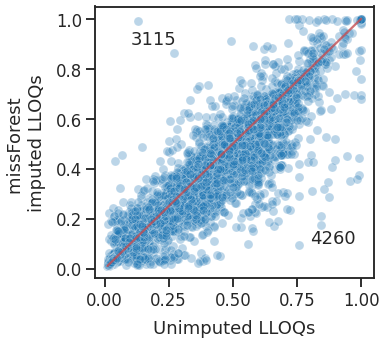

In [9]:
# get the LLOQs pre and post-imputation
orig_lloqs = np.array(fom_orig["LOQ"])
mf_lloqs = np.array(fom_mf["LOQ"])

# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=orig_lloqs, y=mf_lloqs, alpha=0.3)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, mf_lloqs])
set_max = np.nanmax([orig_lloqs, mf_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=0.8)

# add the number of increased and decreased LLOQs
plt.text(0.1, 0.9, n_mf_inc)
plt.text(0.8, 0.1, n_mf_dec)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("missForest \nimputed LLOQs", labelpad=10)

#plt.savefig("mf-vs-no-impute-scatter.png", dpi=250, bbox_inches="tight")

***

## Make barplot

#### Init barplotter object

In [10]:
# init
lloq_plotter = pd.DataFrame(columns=["method", "n decrease", "n increase"])
lloq_plotter["method"] = ["NMF", "KNN", "missForest", "Sample min", "Gaussian sample"]

# fill in 
lloq_plotter.iloc[0]["n decrease"] = n_nmf_decrease_loq
lloq_plotter.iloc[0]["n increase"] = n_nmf_increase_loq

lloq_plotter.iloc[1]["n decrease"] = n_knn_decrease_loq
lloq_plotter.iloc[1]["n increase"] = n_knn_increase_loq

lloq_plotter.iloc[2]["n decrease"] = n_mf_decrease_loq
lloq_plotter.iloc[2]["n increase"] = n_mf_increase_loq

lloq_plotter.iloc[3]["n decrease"] = n_min_decrease_loq
lloq_plotter.iloc[3]["n increase"] = n_min_increase_loq

lloq_plotter.iloc[4]["n decrease"] = n_std_decrease_loq
lloq_plotter.iloc[4]["n increase"] = n_std_increase_loq

# negate the decrease values. Will help with plotting
#lloq_plotter["n decrease"] = -lloq_plotter["n decrease"]

# change up the names a bit
lloq_plotter["method"].iloc[3] = "Low value"
lloq_plotter["method"].iloc[2] = "MissForest"
lloq_plotter["method"].iloc[1] = "kNN"

lloq_plotter

,method,n decrease,n increase
0,NMF,1084,2498
1,kNN,261,2184
2,MissForest,4260,3115
3,Low value,252,1187
4,Gaussian sample,254,1126


#### Plot

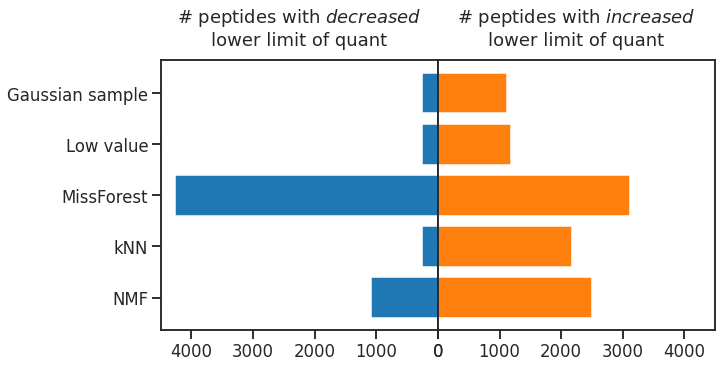

In [14]:
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True, sharex=False)
fig.tight_layout()

axes[0].barh(data=lloq_plotter, y="method", width="n decrease", 
             label="decreased LLOQ", color="#1f77b4")
axes[0].set_title("# peptides with $\it{decreased}$ \nlower limit of quant", pad=15)
axes[0].set_xlim(left=0, right=4500)

axes[1].barh(data=lloq_plotter, y="method", width="n increase", 
             label="increased LLOQ", color="#ff7f0e")
axes[1].set_title("# peptides with $\it{increased}$ \nlower limit of quant", pad=15)
axes[1].set_xlim(left=0, right=4500)

# invert axis of left plot
axes[0].invert_xaxis() 
#axes[1].invert_xaxis() 

# disguise the right plot's ticks by setting them to the same color
    # as the left plot's bars
axes[1].tick_params(axis='y', colors="#1f77b4")

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

#plt.show()
#plt.savefig("lloq-fig-alt2.png", dpi=250, bbox_inches="tight")

***

## Combine

Text(47.25, 0.5, 'missForest \nimputed LLOQs')

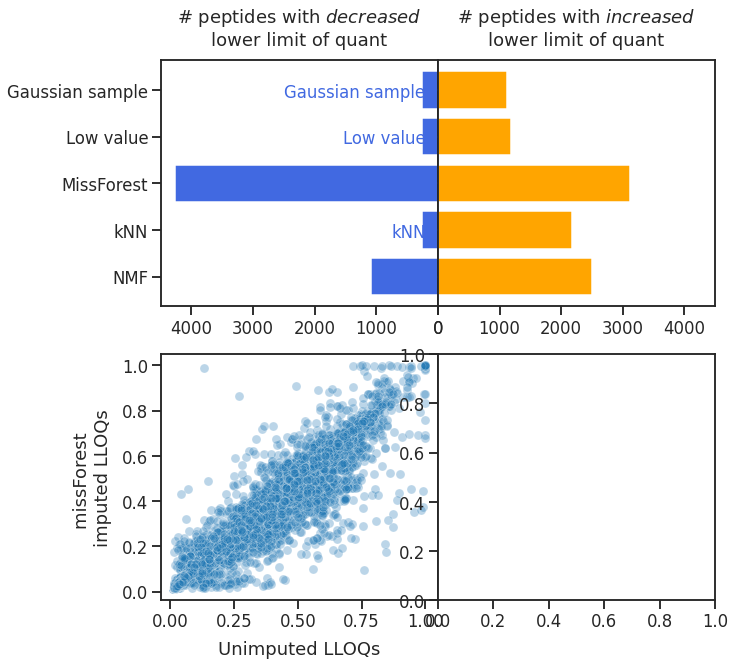

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharey=False, sharex=False)
fig.tight_layout()

axes[0,0].barh(data=lloq_plotter, y="method", width="n decrease", 
             label="decreased LLOQ", color="royalblue")
axes[0,0].set_title("# peptides with $\it{decreased}$ \nlower limit of quant", pad=15)
axes[0,0].set_xlim(left=0, right=4500)

axes[0,1].barh(data=lloq_plotter, y="method", width="n increase", 
             label="increased LLOQ", color="orange")
axes[0,1].set_title("# peptides with $\it{increased}$ \nlower limit of quant", pad=15)
axes[0,1].set_xlim(left=0, right=4500)

# invert axis of left plot
axes[0,0].invert_xaxis() 
#axes[0,1].invert_xaxis() 

# disguise the right plot's ticks by setting them to the same color
    # as the left plot's bars
axes[0,1].tick_params(axis='y', colors='royalblue')

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

sns.scatterplot(x=orig_lloqs, y=mf_lloqs, alpha=0.3, ax=axes[1,0])
axes[1,0].set_xlabel("Unimputed LLOQs", labelpad=10)
axes[1,0].set_ylabel("missForest \nimputed LLOQs", labelpad=10)

#plt.show()
#plt.savefig("lloq-fig-alt.png", dpi=250, bbox_inches="tight")

Text(0, 0.5, 'missForest \nimputed LLOQs')

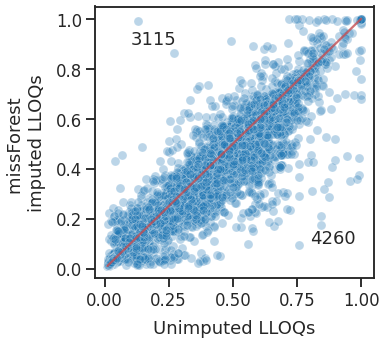

In [13]:
# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=orig_lloqs, y=mf_lloqs, alpha=0.3)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, mf_lloqs])
set_max = np.nanmax([orig_lloqs, mf_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=0.8)

# add the number of increased and decreased LLOQs
plt.text(0.1, 0.9, n_mf_inc)
plt.text(0.8, 0.1, n_mf_dec)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("missForest \nimputed LLOQs", labelpad=10)